In [2]:
#The Imports
#from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [10]:
#Setting Start and end dates
#start = datetime.datetime(2006, 1, 1)
#end = datetime.datetime(2016, 1, 1)
bank_stocks = pd.read_pickle('all_banks') 

bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker             ...        MS                                  WFC  \
Stock Info    Volume    ...      Open   High    Low  Close   Volume   Open   
Date                    ...                                                  
2006-01-03   1537660    ...     57.17  58.49  56.74  58.31  5377000  31.60   
2006-01-04   1871020    ...     58.70  59.28  58.35  58.35  7977800  31.80   
2006-01-05   1143160    ...     58.55  58.59  58.02  58.51  5778000  31.50   
2006-01-06   1370250    ...     58.77  58.85  58.05  58.57  6889800  31.58   
2006-01-09   1680740    ...     58.63  59.29  58.62  59.19  4144500  31.68   

Bank Ticker                                 
Stock Info    High    Low  Close    Volume  
Date                                        
2006-01-03   31.98  31.20  31.90  11016400  
2006-01-04   31.82  31.36  31.53  10871000  
2006-01-05   31.56  31.31  31.50  10158000  
2006-01-06   31.78  31.38  31.68   8403800  
2006-01-09   31.82  31.56  31.68   5619600  

[5 rows x 30 columns]

In [11]:
#Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers
tickers = [ 'BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [12]:
tickers

['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [13]:
#Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks.
#Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.
#bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC ], axis=1,keys=tickers )

In [14]:
#bank_stocks.columns.names = ['Bank Ticker','Stock Info']
#bank_stocks.head()

In [15]:
#bank_stocks[bank_stocks["Close"]]
#for i in tickers:
#bank_stocks.xs("BAC", axis=1, )['Close'].max()

bank_stocks.xs(key='Close', axis=1, level="Stock Info").max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

In [16]:
#** Create a new empty DataFrame called returns. 
#This dataframe will contain the returns for each bank's stock. returns are typically defined by:
#$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [17]:
returns = pd.DataFrame()

In [18]:
#We can use pandas pct_change() method on the Close column to create a column representing this return value.
#Create a for loop that goes and for each Bank Stock Ticker
#creates this returns column and set's it as a column in the returns DataFrame.

In [19]:
for i in tickers:
    returns[i + ' Return'] = bank_stocks[i]['Close'].pct_change()

In [20]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


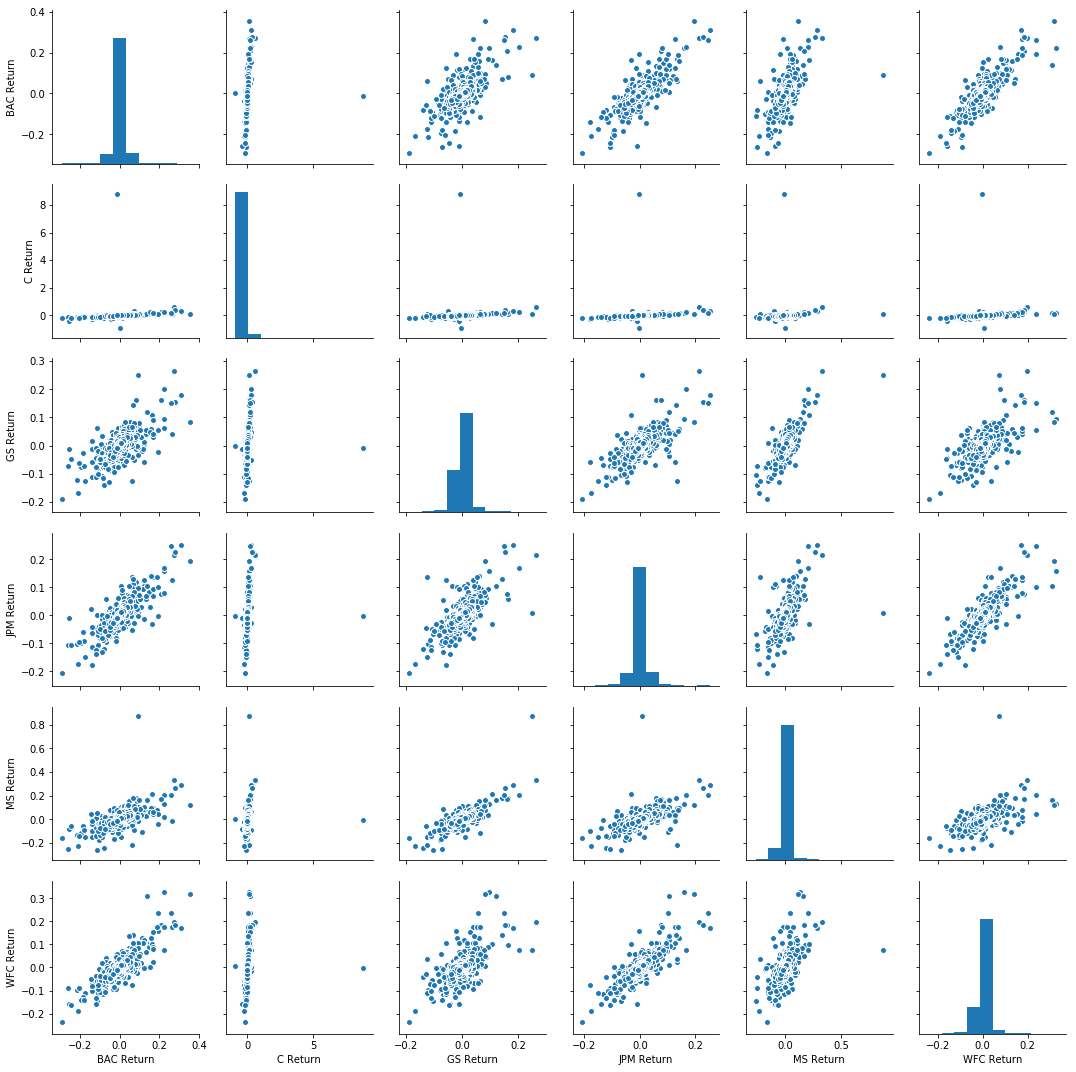

In [21]:
#Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?
import seaborn as sns
sns.pairplot( returns[1:] )